In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/kaggle/input/interview-selection-dataset/Data - Base.csv")
df.shape

(21256, 52)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21256 entries, 0 to 21255
Data columns (total 52 columns):
 #   Column                                                                                                                                             Non-Null Count  Dtype  
---  ------                                                                                                                                             --------------  -----  
 0   Name                                                                                                                                               21256 non-null  object 
 1   Age                                                                                                                                                21256 non-null  object 
 2   Gender                                                                                                                                             21256 non-null  object 
 3   Type o

In [4]:
df.isna().sum()

Name                                                                                                                                                    0
Age                                                                                                                                                     0
Gender                                                                                                                                                  0
Type of Graduation/Post Graduation                                                                                                                      0
Marital status                                                                                                                                          0
Mode of interview given by candidate?                                                                                                                   0
Pre Interview Check                                                         

In [5]:
df.columns

Index(['Name', 'Age', 'Gender', 'Type of Graduation/Post Graduation',
       'Marital status', 'Mode of interview given by candidate?',
       'Pre Interview Check', 'Fluency in English based on introduction',
       'Confidence based on Introduction (English)',
       'Confidence based on the topic given  ',
       'Confidence Based on the PPT Question',
       'Confidence based on the sales scenario',
       'Structured Thinking (In regional only)',
       'Structured Thinking Based on the PPT Question',
       'Structured Thinking( Call pitch)',
       'Regional fluency based on the topic given  ',
       'Regional fluency Based on the PPT Question',
       'Regional fluency based on the  sales scenario',
       'Does the candidate has mother tongue influence while speaking english.',
       'Has acquaintance in Company and has spoken to him/her before applying?',
       'Candidate Status', 'Last Fixed CTC (lakhs) ', 'Currently Employed',
       'Experienced candidate - (Experience 

In [6]:
df.columns = df.columns.str.strip().str.replace(" ", "_").str.lower()

In [7]:
df.rename(columns={'does_the_candidate_has_mother_tongue_influence_while_speaking_english': 'mother_tongue_influence',
                   'has_acquaintance_in_company_and_has_spoken_to_him/her_before_applying?	' : 'spoken_before_applying?',
                   "but,_my_child's_exam_are_going_on_now,_so_we_will_keep_the_counselling_session_after_the_exams_get_over.(time:_favourable_pitch:_counsellor_hype)" : "father_reply",
                   "sir_being_in_education_industry_i_know_this_is_a_marketing_gimmick_and_at_the_end_of_the_day_you'll_be_selling_the_app.": "reply_being_in_education",
                   "mode_of_interview_given_by_candidate?" :"interview_mode"
                  }, inplace=True)

In [8]:
#As it exists in numerical present in numerical form form
columns_to_drop = [
    'confidence_based_on_introduction_(english)',
    'confidence_based_on_the_topic_given',
    'confidence_based_on_the_ppt_question',
    'confidence_based_on_the_sales_scenario',
    'structured_thinking_(in_regional_only)',
    'regional_fluency_based_on_the_ppt_question',
    'regional_fluency_based_on_the__sales_scenario',
    'structured_thinking_based_on_the_ppt_question',
    'structured_thinking(_call_pitch)',
    'regional_fluency_based_on_the_topic_given',
    'regional_fluency_based_on_the_ppt_question.1',
    'regional_fluency_based_on_the__sales_scenario.1'
]

df.drop(columns=columns_to_drop, inplace=True)
df.shape

(21256, 40)

In [9]:
df.isna().sum()

name                                                                         0
age                                                                          0
gender                                                                       0
type_of_graduation/post_graduation                                           0
marital_status                                                               0
interview_mode                                                               0
pre_interview_check                                                          0
fluency_in_english_based_on_introduction                                     0
does_the_candidate_has_mother_tongue_influence_while_speaking_english.       0
has_acquaintance_in_company_and_has_spoken_to_him/her_before_applying?       0
candidate_status                                                          2547
last_fixed_ctc_(lakhs)                                                    2547
currently_employed                                  

In [10]:
df['whether_joined_the_company_or_not'] = df['whether_joined_the_company_or_not'].map({'Joined': 1, 'Yes':1, 'No':0, 'Not Joined': 0})

In [11]:
df.duplicated().sum()

2

In [12]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [13]:
df.dropna(inplace=True)
df.shape

(18681, 40)

# Age visuals

In [14]:
df['age'].value_counts().sort_index()

age
20      445
21     1747
22     3605
23     3037
24     2689
25     1895
26     1523
27     1154
28      908
29      651
30      522
31      363
32      121
32+      21
Name: count, dtype: int64

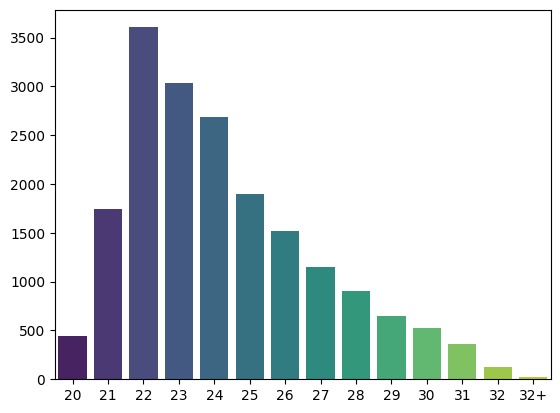

In [15]:
age_counts = {
    '20': 445, '21': 1747, '22': 3605, '23': 3037, '24': 2689, '25': 1895, '26': 1523, 
    '27': 1154, '28': 908, '29': 651, '30': 522, '31': 363, '32': 121, '32+': 21
}
age_series = pd.Series(age_counts)
sns.barplot(x=age_series.index, y=age_series.values, palette="viridis")
plt.show()

In [16]:
# Convert to int
df['age'] = df['age'].replace('32+', '32').astype(int)

In [17]:
bins = [0, 19, 21, 24, 27, 30, 32, float('inf')]
labels = ['0-19', '20-21', '22-24', '25-27', '28-30', '31-32', '60+']

df['age'] = pd.cut(df['age'], bins=bins, labels=labels, right=True)  # Assign directly to 'age'

In [18]:
# bins = [0, 19, 21, 24, 27, 30, 32, float('inf')]
# labels = ['0-19', '20-21', '22-24', '25-27', '28-30', '31-32', '60+']

# df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=True)

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


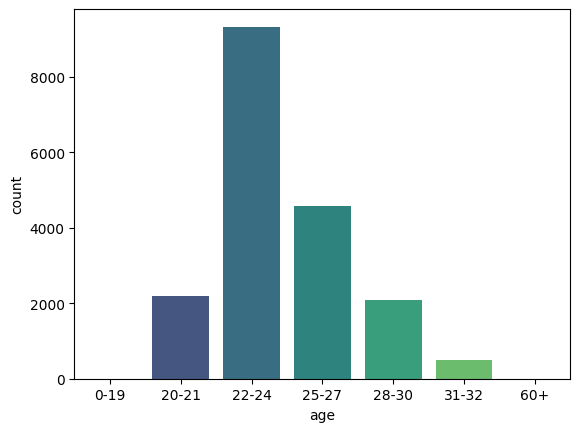

In [19]:
sns.countplot(x=df['age'], palette="viridis", order=labels)
plt.show()

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18681 entries, 0 to 21255
Data columns (total 40 columns):
 #   Column                                                                  Non-Null Count  Dtype   
---  ------                                                                  --------------  -----   
 0   name                                                                    18681 non-null  object  
 1   age                                                                     18681 non-null  category
 2   gender                                                                  18681 non-null  object  
 3   type_of_graduation/post_graduation                                      18681 non-null  object  
 4   marital_status                                                          18681 non-null  object  
 5   interview_mode                                                          18681 non-null  object  
 6   pre_interview_check                                                     186

In [21]:
df['type_of_graduation/post_graduation'].value_counts().head(20)

type_of_graduation/post_graduation
B.E / B-Tech                       6551
BSc or MSc                         3019
B.com (Bachelor of commerce)       2044
BA/MA                              2033
MBA                                1571
BCA/MCA                            1166
BBA or BBM                          879
M.com                               468
M.E / M-Tech                        211
B.pharma/M.pharma                   141
B.ed(Teaching)                      137
Hotel Management                     69
B.comm (Bachelor of mass comm.)      68
PGDM                                 35
BMS                                  15
MSW                                  10
PGDCA                                 9
pgdm                                  7
BVOC                                  6
BCS                                   5
Name: count, dtype: int64

In [22]:
# Define a mapping dictionary
degree_mapping = {
    'B.E / B-Tech': 'Engineering',
    'M.E / M-Tech': 'Engineering',
    'BSc or MSc': 'Science',
    'BCA/MCA': 'Science',
    'BCS': 'Science',
    'B.com (Bachelor of commerce)': 'Commerce & Management',
    'M.com': 'Commerce & Management',
    'BBA or BBM': 'Commerce & Management',
    'MBA': 'Commerce & Management',
    'PGDM': 'Commerce & Management',
    'PGDCA': 'Commerce & Management',
    'BMS': 'Commerce & Management',
    'BA/MA': 'Arts & Humanities',
    'MSW': 'Arts & Humanities',
    'B.pharma/M.pharma': 'Pharmacy & Medical',
    'B.ed(Teaching)': 'Teaching & Education',
    'Hotel Management': 'Hotel Management',
    'B.comm (Bachelor of mass comm.)': 'Mass Communication',
    'BVOC': 'Vocational Studies'
}

#mapping & "Other" to unknown categories
df['type_of_graduation/post_graduation'] = df['type_of_graduation/post_graduation'].map(degree_mapping).fillna('Other')
df['type_of_graduation/post_graduation'].value_counts()

type_of_graduation/post_graduation
Engineering              6762
Commerce & Management    5021
Science                  4190
Arts & Humanities        2043
Other                     244
Pharmacy & Medical        141
Teaching & Education      137
Hotel Management           69
Mass Communication         68
Vocational Studies          6
Name: count, dtype: int64

In [23]:
df['gender'] = df['gender'].map({'Male': 0, 'Female': 1})

In [24]:
df = pd.get_dummies(df, columns=['marital_status'])


In [25]:
df = pd.get_dummies(df, columns=['interview_mode'])

In [26]:
df.drop(columns=['pre_interview_check',
                 'fluency_in_english_based_on_introduction',
                 'does_the_candidate_has_mother_tongue_influence_while_speaking_english.'], inplace=True)
df.shape

(18681, 40)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18681 entries, 0 to 21255
Data columns (total 40 columns):
 #   Column                                                                  Non-Null Count  Dtype   
---  ------                                                                  --------------  -----   
 0   name                                                                    18681 non-null  object  
 1   age                                                                     18681 non-null  category
 2   gender                                                                  18681 non-null  int64   
 3   type_of_graduation/post_graduation                                      18681 non-null  object  
 4   has_acquaintance_in_company_and_has_spoken_to_him/her_before_applying?  18681 non-null  object  
 5   candidate_status                                                        18681 non-null  object  
 6   last_fixed_ctc_(lakhs)                                                  186

In [28]:
df['has_acquaintance_in_company_and_has_spoken_to_him/her_before_applying?'].unique()

array(['No', 'Yes'], dtype=object)

In [29]:
df['has_acquaintance_in_company_and_has_spoken_to_him/her_before_applying?'] = df['has_acquaintance_in_company_and_has_spoken_to_him/her_before_applying?'].map({'Yes': 1, 'No': 0})

In [30]:
df['candidate_status'].value_counts()

candidate_status
Fresher(only 2022 grad)                                             8591
Lateral(2021 and before with (less than 6 months) experience)       3639
Experienced in client facing(equal to or more than 6 months)        3429
Experienced in non client facing(equal to or more than 6 months)    3022
Name: count, dtype: int64

In [31]:
df['last_fixed_ctc_(lakhs)'].unique()

array(['5-5.99', 'Fresher', '2-2.99', '3-3.99', '4-4.99', '0-1.99', '7+',
       '6-6.99'], dtype=object)

In [32]:
df['last_fixed_ctc_(lakhs)'].value_counts()

last_fixed_ctc_(lakhs)
Fresher    11898
2-2.99      2720
3-3.99      1702
0-1.99      1371
4-4.99       660
5-5.99       201
6-6.99        72
7+            57
Name: count, dtype: int64

In [33]:
ctc_mapping = {'Fresher': 0,
               '0-1.99': 1,
               '2-2.99': 2.5,
               '3-3.99': 3.5,
               '4-4.99': 4.5,
               '5-5.99': 5.5,
               '6-6.99': 6.5,
               '7+': 7
              }
df['last_fixed_ctc_(lakhs)'] = df['last_fixed_ctc_(lakhs)'].map(ctc_mapping)

In [34]:
df['last_fixed_ctc_(lakhs)'].head(10)

0    5.5
1    0.0
2    0.0
3    0.0
4    0.0
5    2.5
6    0.0
7    0.0
8    0.0
9    3.5
Name: last_fixed_ctc_(lakhs), dtype: float64

In [35]:
df.shape

(18681, 40)

In [36]:
df['currently_employed'].unique()

array(['No', 'Yes'], dtype=object)

In [37]:
df['currently_employed'] = df['currently_employed'].map({'Yes': 1, 'No': 0})

In [38]:
df.shape

(18681, 40)

In [39]:
# Selecting numerical columns (int64, float64, or bool)
num_df = df.select_dtypes(include=['int64', 'float64', 'bool'])

# Selecting categorical/object columns
cat_df = df.select_dtypes(include=['object', 'category'])

# Display the first few rows
print("Numerical DataFrame:")
num_df.head()

Numerical DataFrame:


,gender,has_acquaintance_in_company_and_has_spoken_to_him/her_before_applying?,last_fixed_ctc_(lakhs),currently_employed,confidence_based_on_introduction_(english).1,confidence_based_on_the_topic_given__.1,confidence_based_on_the_ppt_question.1,confidence_based_on_the_sales_scenario.1,structured_thinking_(in_regional_only).1,structured_thinking_based_on_the_ppt_question.1,...,confidence_score,structured_thinking_score,regional_fluency_score,total_score,whether_joined_the_company_or_not,marital_status_Divorced,marital_status_Married,marital_status_Unmarried,interview_mode_Laptop,interview_mode_Mobile
0,1,0,5.5,0,3,2,3,3,2,3,...,11,7,3,42,0,False,False,True,False,True
1,1,0,0.0,0,3,3,3,3,3,3,...,12,9,9,60,0,False,False,True,False,True
2,1,1,0.0,1,2,3,2,3,3,3,...,10,9,7,52,1,False,False,True,False,True
3,0,0,0.0,0,3,3,3,3,3,3,...,12,9,9,60,1,False,False,True,True,False
4,0,0,0.0,0,2,3,2,3,2,2,...,10,5,7,44,0,False,False,True,False,True


In [40]:
print("Categorical DataFrame:")
cat_df.head()


Categorical DataFrame:


,name,age,type_of_graduation/post_graduation,candidate_status,experienced_candidate_-_(experience_in_months),experienced_candidate_(nature_of_work),what_was_the_type_of_role?,how_many_slides_candidate_have_submitted_in_ppt?,call-pitch_elements_used_during_the_call_sales_scenario,father_reply,let_me_discuss_it_with_my_child,reply_being_in_education,role_acceptance,interview_verdict,candidate_is_willing_to_relocate,role_location_to_be_given_to_the_candidate,comments,redflags_comments_in_interview
0,parida,25-27,Other,Experienced in non client facing(equal to or m...,6-11.99 Months,tech,Fresher,More than 6 slides,Purpose of Call (Book a Counselling Session),Urgency using Time,None of the above,None of the above,Yes : Think and says yes.(Shows some hesitation),Reject,Yes - Anywhere Within a City,Bangalore,"Lipsa is 25 female from Orissa, Family BG - Fa...",At least Graduated ( not 12th Pass or diploma ...
1,shreej,28-30,Science,Lateral(2021 and before with (less than 6 mont...,Fresher(<6 months),Fresher(<6 months),Fresher,2 - 3 slides,"Introduction (Self Intro,Company Name), Purpos...",Asking Questions,None of the above,Non chargeable session,Emphatic Yes,Reject,Yes - Anywhere in PAN India,Delhi,29 yo / female / unmarried / MSc Finance UK 20...,Not Rehire (CDT have not joined byjus in sales...
2,ms6744,25-27,Engineering,Fresher(only 2022 grad),Fresher(<6 months),Fresher(<6 months),Individual Contributor,5 - 6 slides,"Introduction (Self Intro,Company Name)",Urgency using Time,Decision Making: Major decision of child futur...,Non chargeable session,Emphatic Yes,Premium Select,Yes - Anywhere Within a City,Chennai,nm,Not working currently and ready to join the R3...
3,aswalu,22-24,Engineering,Fresher(only 2022 grad),Fresher(<6 months),Fresher(<6 months),Fresher,5 - 6 slides,"Introduction (Self Intro,Company Name), Purpos...","Urgency using Time, Urgency using situation",None of the above,Value creation(Nothing comes for free),Emphatic Yes,Premium Select,Yes - Anywhere in PAN India,Delhi,Final Interview Done 22YRS //UTTARAKHAND // F...,Not Rehire (CDT have not joined byjus in sales...
4,aniket,22-24,Arts & Humanities,Fresher(only 2022 grad),Fresher(<6 months),Fresher(<6 months),Fresher,1 slide,None of the Above,Urgency by creating counsellor Hype,Anticipation of objection from child's end:,Value creation(Nothing comes for free),Yes : Think and says yes.(Shows some hesitation),Borderline Select,No - Want Specific Centre Location Only,Bangalore,"Aniket is 22 male from Bhopal, BA Grad 21, Fam...","Age is below 32.11, At least Graduated ( not 1..."


In [41]:
# import pandas as pd
# import numpy as np
# from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# df.drop(columns=['name'], inplace=True)

# # Convert age range to mean values
# df['age'] = df['age'].apply(lambda x: np.mean([int(i) for i in str(x).split('-')]))

# # Convert experience range to mean values
# df['experienced_candidate_-_(experience_in_months)'] = df['experienced_candidate_-_(experience_in_months)'].apply(
#     lambda x: np.mean([float(i.replace(' Months', '')) for i in str(x).replace('Fresher(<6 months)', '0-5.99').split('-')])
# )

# # Ordinal encoding for interview verdict (ordered levels)
# verdict_mapping = {"Reject": 0, "Borderline Select": 1, "Premium Select": 2}
# df["interview_verdict"] = df["interview_verdict"].map(verdict_mapping)

# # Binary encoding for relocation decision
# df["candidate_is_willing_to_relocate"] = df["candidate_is_willing_to_relocate"].apply(lambda x: 1 if "Yes" in str(x) else 0)

# # One-hot encoding for categorical columns
# categorical_cols = ['type_of_graduation/post_graduation', 'candidate_status', 
#                     'experienced_candidate_(nature_of_work)', 'what_was_the_type_of_role?',
#                     'role_location_to_be_given_to_the_candidate']
# ohe = OneHotEncoder(drop="first", sparse=False)
# encoded_cats = pd.DataFrame(ohe.fit_transform(df[categorical_cols]), columns=ohe.get_feature_names_out(categorical_cols))

# # Drop original categorical columns and merge new encoded features
# df = df.drop(columns=categorical_cols).reset_index(drop=True)
# df = pd.concat([df, encoded_cats], axis=1)

# # Save the transformed dataset
# df.to_csv("processed_categorical_data.csv", index=False)

# print("Data conversion completed! 🚀")
